In [1]:
from PIL import Image
from matplotlib import pyplot
from math import sqrt
from math import cos
from math import sin
from math import pi


"""
Image_IFS takes an image a numpy array and applies an iterated function system to it.
    Each function is an Affine_Contraction, which is stored in a list. 
    Functions can be added using add_function()
"""
class Image_IFS: 
    """
    Constructor accepts a seed image to transform with the IFS as well as a size for
        the output image. The default size is 512x512.
    """
    def __init__(self, seed_image=None, image_size=512, center_origin=False):
        self.image_size = image_size
        if (seed_image == None):
            # Default seed_image is a white triangle
            self.initialize_square()
        else:
            self.seed_image = seed_image.resize((self.image_size, self.image_size))
        self.image = self.seed_image
        self.center_origin = center_origin
        self.functions = []

    """
    Add_function() accepts scaling factor and 2-tuple translation in the form
        (x-shift, y-shift) as a percentage  of the image size
    """
    def add_function(self, scale, translation):
        self.functions.append((scale, translation))
        
    """
    iterate() accepts an integer number of iterations. The IFS is applied to the seed
        image that many times, and the result is stored in self.image. To display
        the resulting image, use the display_image() method
    """
    def iterate(self, num_iterations, first_call=True):        
        if (num_iterations > 0):
            # If this is the first iteration, use the seed image
            if (first_call):
                # Flip the vertical axis so the origin is at the bottom left
                seed_image = self.seed_image.transpose(Image.FLIP_TOP_BOTTOM)
            else:
                seed_image = self.image
            # Create new transparent base image to put the transformed copies on
            self.image = Image.new('RGBA', (self.image_size, self.image_size),
                                   (0,0,0,0))
            # Apply each contraction in the IFS and combine the resulting images
            for contraction in self.functions:
                scale = int(contraction[0] * self.image_size)
                current_image = seed_image.resize((scale, scale))
                # Move origin to center, otherwise origin at bottom left
                x_offset = scale if self.center_origin else 0
                y_offset = scale if self.center_origin else 0
                # Apply translation
                x_offset += int(contraction[1][0] * self.image_size)
                y_offset += int(contraction[1][1] * self.image_size)
                # In order to have a transparency mask so the corners of the image
                # don't cover part of the attractor, we paste the scaled image onto
                # a full size transparency and then paste that onto the actual image.
                transparency = Image.new('RGBA', (self.image_size, self.image_size), (0,0,0,0))
                transparency.paste(current_image, (x_offset, y_offset))
                self.image.paste(transparency, mask=transparency)
            # Recursively reapply the IFS for the desired number of iterations
            self.iterate(num_iterations - 1, False)
        elif (num_iterations == 0 and first_call == False):
            # Create black background
            background_image = Image.new('RGBA', (self.image_size, self.image_size), 
                                         (0,0,0,255))
            background_image.paste(self.image, mask=self.image)
            self.image = background_image
            # Un-flip the vertical axis
            self.image = self.image.transpose(Image.FLIP_TOP_BOTTOM)
            
    """
    display_image() uses pyplot to display the image created by the IFS.
    """
    def display_image(self):
        pyplot.imshow(self.image)
        pyplot.axis('off')
        pyplot.show()
             
    """
    initialize_square() creates a seed image of that is entirely white. 
        This is initialized the seed image if an Image_IFS is instantiated without a seed image
    """
    def initialize_square(self):
        # Create opaque white square
        self.seed_image = Image.new("RGBA", (self.image_size, self.image_size),
                                    (255, 255, 255, 255))
    
    """
    n_sierpnski() Initializes the IFS to generate the n-row analogue of the Sierpinski Gasket.
        The standard Sierpinski Gasket repeats after two rows of triangles, 
        while the n-row analogue repeats after n rows of triangles.
    """
    def n_sierpinski(self, n):
        scale = 1/n
        for i in range(0, n):
            for j in range(0, n - i):
                x_offset = (i + 2*j) / (2*n)
                y_offset = (i * sqrt(3)) / (2*n)
                test.add_function(scale, (x_offset, y_offset))    
    
    """
    polygon_ifs() Initializes the IFS using the vertices of a regular polygon
    """
    def polygon_ifs(self, num_vertices, include_center=False):
        scale = 2 / num_vertices
        # omega = (2*pi) / num_vertices
        omega = math.pi* scale
        for k in range(0, num_vertices):
            hexagon.add_function(scale, (scale*math.cos(omega*k), scale*math.sin(omega*k)))
        if(include_center):
            hexagon.add_function(scale, (0,0))            
        

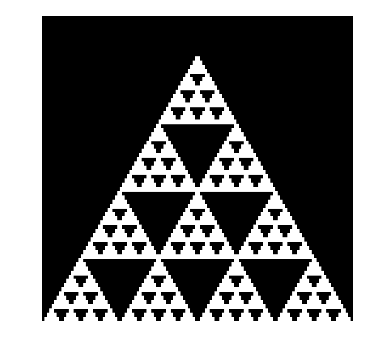

In [2]:
#img = Image.open('pic.jpg')

n = 4
num_iterations = 3

test = Image_IFS()

test.n_sierpinski(n)


test.iterate(num_iterations)
test.display_image()

[(0.3333333333333333, (0.3333333333333333, 0.0)), (0.3333333333333333, (2.041077998578922e-17, 0.3333333333333333)), (0.3333333333333333, (-0.3333333333333333, 4.082155997157844e-17)), (0.3333333333333333, (-6.123233995736765e-17, -0.3333333333333333)), (0.3333333333333333, (0, 0))]


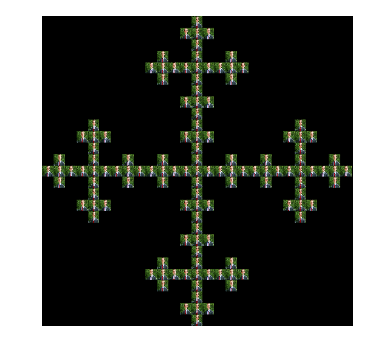

In [11]:
num_iterations = 3
num_vertices = 4
image_size = 512

scale = 1/3
shrink = scale

seed = "C:\\Users\\blepfo\\Pictures\\Linkedineidted.jpg"
seed = Image.open(seed)

hexagon = Image_IFS(image_size=image_size, seed_image=seed, center_origin=True)

# Create hexagon vertices
omega = (2*pi) / num_vertices
for k in range(0, num_vertices):
    hexagon.add_function(scale, (shrink*cos(omega*k), shrink*sin(omega*k)))
    
hexagon.add_function(scale, (0,0))
hexagon.iterate(num_iterations)

print(hexagon.functions)
hexagon.display_image()